Downloading: rain for year 1990
Downloading: rain for year 1991
Downloading: rain for year 1992
Downloading: rain for year 1993
Downloading: rain for year 1994
Downloading: rain for year 1995
Download Successful !!!


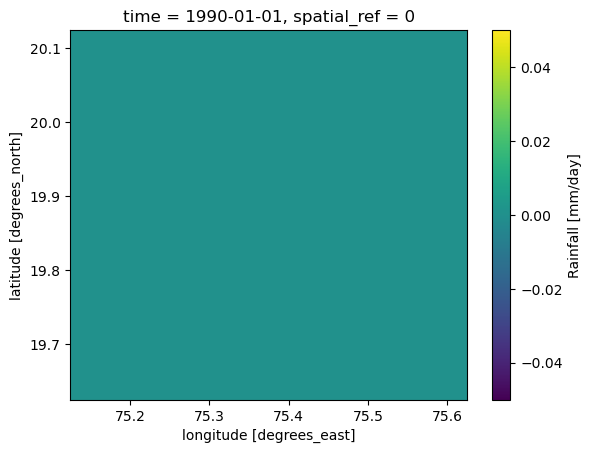

In [8]:
import imdlib as imd
import geopandas as gpd
from shapely.geometry import mapping
import rioxarray

# Define the start and end years
start_yr = 1990
end_yr = 1995
variable = 'rain'  # Other options are ('tmin', 'tmax')

# Downloading 30 years of rainfall data for India
imd.get_data(variable, start_yr, end_yr, fn_format='yearwise')

# Loading the downloaded data
data = imd.open_data(variable, start_yr, end_yr, 'yearwise')
ds = data.get_xarray()

# Define lat/lon and set the CRS
pr = ds.rio.set_spatial_dims('lon', 'lat')
pr = pr.rio.write_crs("EPSG:4326", inplace=True)

# Get the shapefile to be extracted
shapefile_path = r'D:\Additional Work\Aurangabad_3_Cities\Three Cities\Three Cities\Shape File\Aurangabad_Municipal_43N.shp'
sf = gpd.read_file(shapefile_path)

# Ensure the shapefile has the same CRS as the raster data
if sf.crs.to_string() != "EPSG:4326":
    sf = sf.to_crs("EPSG:4326")

# Extract/mask from the shapefile
clipped = pr.rio.clip(sf.geometry.apply(mapping), sf.crs, all_touched=True)

# Check for the values (optional)
clipped[variable].isel(time=133).plot()  # Plot the first time step of the 'rain' variable

# Save to file in NetCDF format
save_nc = r'D:\Git\Projects\Git files\Rainfall-analysis\IMD_Rain_Clipped.nc'
clipped.to_netcdf(save_nc)
